<a href="https://colab.research.google.com/github/venu-analytics/Analytics-Projects/blob/main/Hewlett_Packard_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement:
- Candidate have to read the data and create a model based on the data analysis
to identify if the website is legitimate or phishing website. The result will be determined by the two values [1, -1] where 1 represents the legitimate and -1 represents the phishing.

## Model building -
- We will be solving the above mentioned problem statement by using LightGBM model.
- Light gradient boosted machine (LightGBM) is an ensemble method that uses a tree-based learning algorithm. LightGBM grows trees vertically (leaf-wise) compared to other tree-based learning algorithms that grow horizontally (level-wise).

- A quick illustration to visualise the difference between vertical and horizontal tree growing.
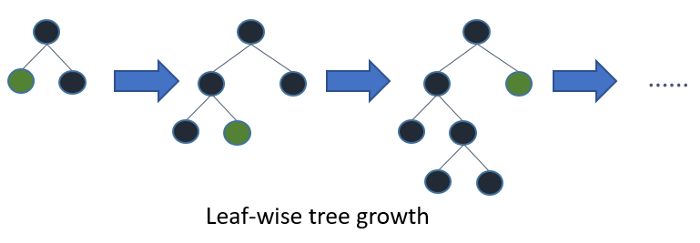
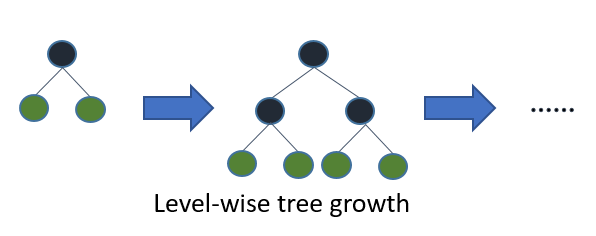

- LightGBM allows for over 100 hyperparameters that can be tuned to your liking. However, I will be focusing on the core LightGBM classification model without any hyperparameter tuning to solve this problem.

In [ ]:
# Required packages to solve the above mentioned problem statement.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb

## Loading the Dataset

In [ ]:
data = pd.read_csv("/content/Phising_Training_Dataset.csv")

In [ ]:
data.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,12344,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,12345,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,12346,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,12347,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,12348,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


- The goal is to perform a binary classification using the LightGBM model to predict if a website is phishing or not based on several variables.

- Like most steps in predictive modelling, it would be good to look at the distribution of the target variable.

In [ ]:
data.Result.value_counts()

 1    5034
-1    3921
Name: Result, dtype: int64

- The target variable distribution shows that it is imbalanced with the target class 1 is slightly higher than -1. I would not be doing any rebalancing for this data so let’s define the features and target variable.

## Defining Features and Target Variable

In [ ]:
X = data.drop(['Result'], axis=1)
y = data['Result']

## Training and Testing Split

- Next, we will partition the dataset into a training and testing dataset. Since we have a significant number of records, I will be using an 80/20 training and testing split.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

- Once that is done, we can begin to implement the LightGBM Model.

## LightGBM Model Training, Testing and Classification Metrics

In [ ]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

- We can also visualise the model’s accuracy.

In [ ]:
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM accuracy score: 0.9682


- To check for overfitting, we can compare the model’s performance on the training set against the actual performance on the testing set.

In [ ]:
# Training set score
y_pred_train = clf.predict(X_train)
print('LightGBM Model training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

# Testing set score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model testing-set accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model training-set accuracy score: 0.9880
LightGBM Model testing-set accuracy score: 0.9682


- Great, it’s good that the actual testing and training scores do not differ too vastly. This shows that the model is not overfitting.

- We can also view the confusion matrix to look at the True Positives (TP), True Negatives (TN), False Positives (FP) and False Negatives (FN) of the model. These are helpful values to help in the calculation of Specificity and Sensitivity.

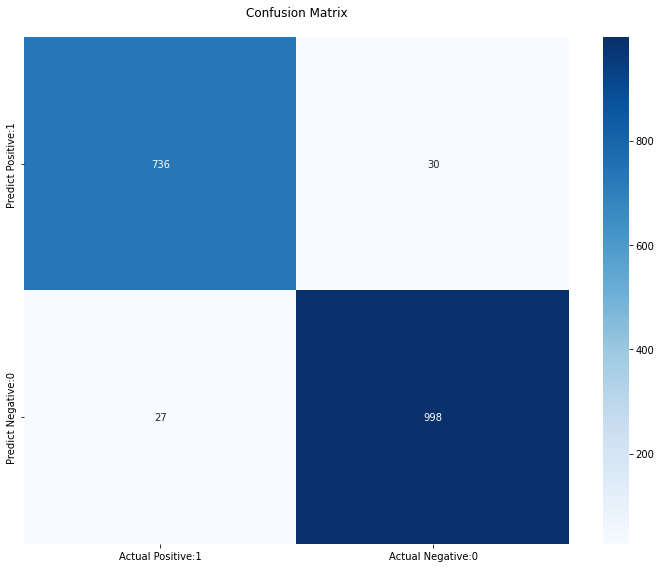

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix\n")
plt.tight_layout()

- Lastly, we can also look at the classification metrics of the LightGBM model we just built.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.96      0.96      0.96       766
           1       0.97      0.97      0.97      1025

    accuracy                           0.97      1791
   macro avg       0.97      0.97      0.97      1791
weighted avg       0.97      0.97      0.97      1791



- We can see from the classification metrics that the base LightGBM model we just built has a relatively high precision scoring that correctly classifies the correct class.

- It also has a relatively high f1-score when classifying websites that are not phishy and a moderately high f1-score when classifying websites that are phishy.

For simplicity measures, the classifications metrics from the classification report can be interpreted as follows:

- **Recall**: How many of the target classes can be found over all of the similar target classes.
- **Precision**: The number of correctly classified classes among that particular class.
- **F1-Score**: Conveys the balance between precision and recall.
- **Support**: Occurance of a given class in the dataset, helpful in identifying the balance of the target variable in the dataset.
This sums up the basic use of the LightGBM model, which can be implemented very quickly for binary classification problems.

## Evaluating the model performance on given test data and generating the submission file

In [ ]:
test_data = pd.read_csv('/content/Phising_Testing_Dataset.csv')

In [ ]:
test_y_pred = clf.predict(test_data)

In [ ]:
pd.DataFrame({'key':test_data.key.values, 'Result':test_y_pred}).to_csv('Hackathon_Submission.csv', index=False)